In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from keras.regularizers import l2


In [2]:
final_df = pd.read_csv("outputs/ranked_df.csv")
#final_df['X']=final_df['Unnamed: 0']
#final_df.drop(list(filter(lambda x: x.startswith('Unname'), final_df)), axis = 1, inplace = True)
#final_df.set_index('X', inplace=True)
final_df.drop('X', axis=1, inplace=True)
final_df.head()

,NEUI,DD,SQFT,WKHRS,PBA.15,NWKER,PBA.16,RFGWIN,NGUSED.1,RFGICN,...,RFGSTP,NGSRC..1,PBA.5,LABEQP.1,CLVVAV.1,RFGRES.2,RFTILT.1,RFCNS.6,PBA.91,GLSSPC.4
0,0.000001,7747,7.783641,2.833213,0.0,1.098612,0.0,0.000000,0.0,0.000000,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000010,5293,11.643962,4.290459,0.0,3.970292,0.0,1.098612,1.0,1.098612,...,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.000003,5978,7.844241,3.713572,1.0,2.397895,0.0,0.693147,0.0,0.000000,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000021,4689,13.122365,5.129899,0.0,5.111988,0.0,2.564949,1.0,3.091042,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.000013,4957,10.308986,4.189655,0.0,2.995732,0.0,0.000000,0.0,0.000000,...,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [3]:
final_df.describe()

,NEUI,DD,SQFT,WKHRS,PBA.15,NWKER,PBA.16,RFGWIN,NGUSED.1,RFGICN,...,RFGSTP,NGSRC..1,PBA.5,LABEQP.1,CLVVAV.1,RFGRES.2,RFTILT.1,RFCNS.6,PBA.91,GLSSPC.4
count,6.501000e+03,6501.000000,6501.000000,6501.000000,6501.000000,6501.000000,6501.000000,6501.000000,6501.000000,6501.000000,...,6501.000000,6501.000000,6501.000000,6501.000000,6501.00000,6501.000000,6501.000000,6501.000000,6501.000000,6501.000000
mean,2.099271e-05,5226.166436,10.173946,4.119922,0.055376,3.163075,0.062298,0.417206,0.666820,0.500959,...,0.352869,0.369943,0.106291,0.083526,0.36056,0.235041,0.536071,0.265959,0.012921,0.101677
std,2.824480e-05,1381.129918,1.871357,0.900723,0.228730,1.952523,0.241715,0.701674,0.471386,0.900401,...,2.671920,0.482826,0.308234,0.276696,0.48020,0.424057,0.498736,0.441877,0.112943,0.302246
min,2.545113e-10,1652.000000,6.909753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.608236e-06,4344.000000,8.517393,3.828641,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.247306e-05,5243.000000,9.998843,4.110874,0.000000,2.772589,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.367313e-05,6154.000000,11.678448,4.663439,0.000000,4.430817,0.000000,0.693147,1.000000,0.693147,...,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000
max,3.984819e-04,10760.000000,14.220976,5.129899,1.000000,8.779711,1.000000,3.511545,1.000000,4.836282,...,30.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#df = final_df

In [5]:
#log_final_df=np.log(final_df+1)
#log_final_df.isnull().values.any()

In [6]:
#np.isinf(log_final_df).values.any()

In [7]:
# Min Max Scaler
names = final_df.columns
indexes = final_df.index
sc = MinMaxScaler((0, 1))
data_scaled = sc.fit_transform(final_df)
df = pd.DataFrame(data_scaled, columns=names, index=indexes)
df.head()

,NEUI,DD,SQFT,WKHRS,PBA.15,NWKER,PBA.16,RFGWIN,NGUSED.1,RFGICN,...,RFGSTP,NGSRC..1,PBA.5,LABEQP.1,CLVVAV.1,RFGRES.2,RFTILT.1,RFCNS.6,PBA.91,GLSSPC.4
0,0.003635,0.669192,0.119527,0.552294,0.0,0.125131,0.0,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.024494,0.399758,0.647526,0.836363,0.0,0.452212,0.0,0.312857,1.0,0.227161,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.006402,0.474967,0.127815,0.723907,1.0,0.273118,0.0,0.197391,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.051845,0.333443,0.849736,1.000000,0.0,0.582250,0.0,0.730433,1.0,0.639136,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.032346,0.362868,0.464934,0.816713,0.0,0.341211,0.0,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


# Utilities

In [20]:
def format_output(data):
    y = data.pop('NEUI')
    y = np.array(y)
    return y


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.savefig('error.png')
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

# Splittng the data

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 70 train / 30 test
train, test = train_test_split(df, test_size=0.3)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('NEUI')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
#norm_train_X = norm(train)
#norm_test_X = norm(test)

norm_train_X = tf.keras.utils.normalize(train)
norm_test_X = tf.keras.utils.normalize(test)

norm_test_X.head()

,DD,SQFT,WKHRS,PBA.15,NWKER,PBA.16,RFGWIN,NGUSED.1,RFGICN,RFGCOMPN,...,RFGSTP,NGSRC..1,PBA.5,LABEQP.1,CLVVAV.1,RFGRES.2,RFTILT.1,RFCNS.6,PBA.91,GLSSPC.4
4196,0.027491,0.245619,0.314950,0.000000,0.198212,0.31495,0.124337,0.314950,0.156157,0.203560,...,0.0,0.000000,0.000000,0.31495,0.31495,0.000000,0.314950,0.0,0.0,0.0
1709,0.100904,0.034297,0.370365,0.427658,0.078395,0.00000,0.084416,0.427658,0.061293,0.000000,...,0.0,0.000000,0.000000,0.00000,0.00000,0.427658,0.000000,0.0,0.0,0.0
1003,0.059084,0.127266,0.336271,0.411737,0.097518,0.00000,0.081273,0.411737,0.059011,0.000000,...,0.0,0.000000,0.000000,0.00000,0.00000,0.411737,0.000000,0.0,0.0,0.0
4304,0.266049,0.248067,0.451798,0.000000,0.153982,0.00000,0.000000,0.000000,0.000000,0.064239,...,0.0,0.563792,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0
5355,0.048125,0.152321,0.362492,0.000000,0.156860,0.00000,0.000000,0.452348,0.000000,0.000000,...,0.0,0.000000,0.452348,0.00000,0.00000,0.000000,0.452348,0.0,0.0,0.0


# Build the Model

In [10]:
# ==========================================================
# define functions
# ==========================================================
def build_model(hp):
    # Define model layers.
    input_layer = Input(shape=(len(train.columns),))
    first_dense = Dense(units='2048', activation='relu')(input_layer)
    second_dense = Dense(units='1024', activation='relu')(first_dense)
    third_dense = Dense(units='512', activation='relu')(second_dense)
    fourth_dense = Dense(units='256', activation='relu')(third_dense)
    fifth_dense = Dense(units='128', activation='relu')(fourth_dense)
    sixth_dense = Dense(units='64', activation='relu')(fifth_dense)
    seventh_dense = Dense(units='32', activation='relu')(sixth_dense)
    eighth_dense = Dense(units='16', activation='relu')(seventh_dense)
    #neinth_dense = Dense(units='16', activation='relu')(eighth_dense)
    #tenth_dense = Dense(units='8', activation='relu')(neinth_dense)
    #eleventh_dense = Dense(units='4', activation='relu')(tenth_dense)
    #twelwth_dense = Dense(units='2', activation='relu')(eleventh_dense)


    # Y2 output will come via the third dense
    y_output = Dense(units='1', name='y_output')(eighth_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=y_output)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001),
                  loss=mse, metrics=tf.keras.metrics.RootMeanSquaredError())

    return model

In [11]:
# Define model layers.
input_layer = Input(shape=(len(train.columns),))
first_dense = Dense(units='2048', activation='relu')(input_layer)
second_dense = Dense(units='1024', activation='relu')(first_dense)
third_dense = Dense(units='512', activation='relu')(second_dense)
fourth_dense = Dense(units='256', activation='relu')(third_dense)
fifth_dense = Dense(units='128', activation='relu')(fourth_dense)
sixth_dense = Dense(units='64', activation='relu')(fifth_dense)
seventh_dense = Dense(units='32', activation='relu')(sixth_dense)
eighth_dense = Dense(units='16', activation='relu')(seventh_dense)
#neinth_dense = Dense(units='16', activation='relu')(eighth_dense)
#tenth_dense = Dense(units='8', activation='relu')(neinth_dense)
#eleventh_dense = Dense(units='4', activation='relu')(tenth_dense)
#twelwth_dense = Dense(units='2', activation='relu')(eleventh_dense)

# Y2 output will come via the third dense
y_output = Dense(units='1', name='y_output')(eighth_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=y_output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 2048)              51200     
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256  

2022-04-15 01:09:38.549410: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10519 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0000:06:00.0, compute capability: 3.7


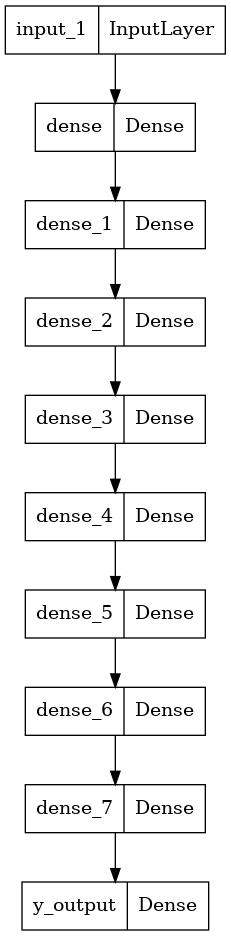

In [12]:
plot_model(model)

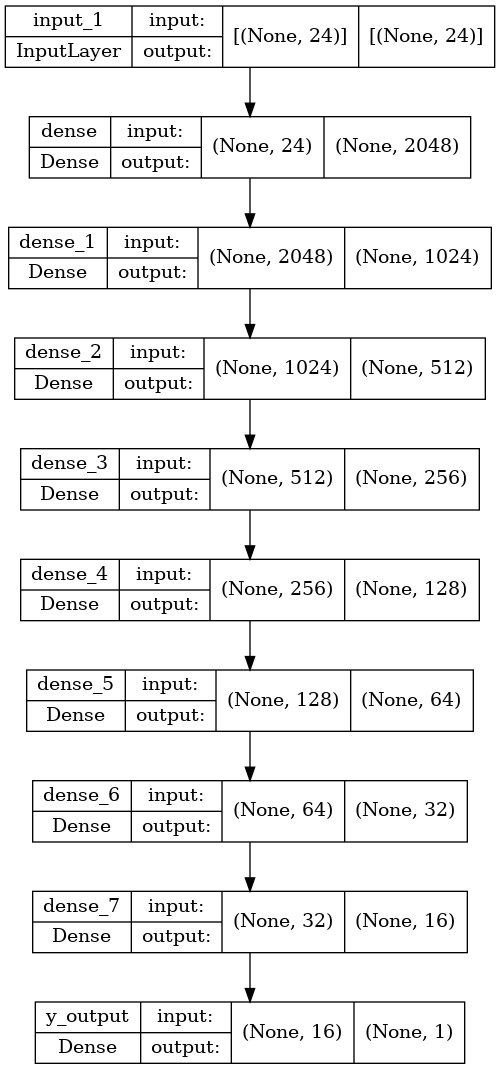

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Configure parameters

In [14]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0000001)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=tf.keras.metrics.RootMeanSquaredError())

# Train the Model

In [15]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
455/455 [==============================] - 5s 8ms/step - loss: 0.0068 - root_mean_squared_error: 0.0826 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 2/500
455/455 [==============================] - 4s 8ms/step - loss: 0.0067 - root_mean_squared_error: 0.0816 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 3/500
455/455 [==============================] - 3s 7ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 4/500
455/455 [==============================] - 3s 7ms/step - loss: 0.0063 - root_mean_squared_error: 0.0792 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 5/500
455/455 [==============================] - 3s 8ms/step - loss: 0.0061 - root_mean_squared_error: 0.0778 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0851
Epoch 6/500
455/455 [==============================] - 4s 8ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0070 

In [16]:
# Test the model and print loss and mse for both outputs
Y_loss, Y_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Y_loss = {}, Y_mse = {}".format(Y_loss, Y_rmse))

61/61 [==============================] - 0s 3ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528
Y_loss = 0.0027927302289754152, Y_mse = 0.05284629017114639


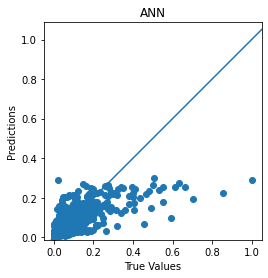

In [22]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y, Y_pred, title='ANN')

In [ ]:
plot_metrics(metric_name='root_mean_squared_error', title='Y RMSE', ylim=0.08)

In [18]:
#Create model evaluation function
from sklearn.metrics import r2_score
R2 = np.mean(r2_score(test_Y, Y_pred))
print('R2 score = %.3f' % R2)
r2 = r2_score

R2 score = 0.519


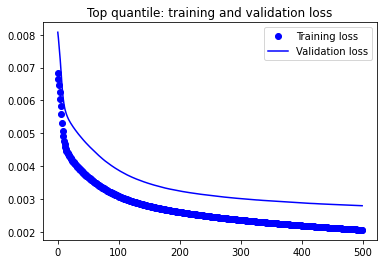

In [23]:
from matplotlib import pyplot as plt

epochs = 500

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Top quantile: training and validation loss')
plt.legend()
plt.savefig('error.png')
plt.show()